In [1]:
!pip install opencv-python scikit-learn numpy matplotlib 

In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

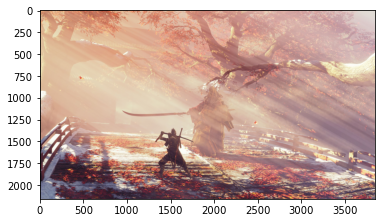

In [2]:
image = cv2.imread('E3jO3PAXwAA1dAh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
        
    return hex_color

In [4]:
def prep_image(raw_img):
    # modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = raw_img.reshape(raw_img.shape[0]*raw_img.shape[1], 3)
    
    return modified_img

In [5]:
def color_analysis(img):
    clf = KMeans(n_clusters = 15)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    
    plt.figure(figsize = (15, 15))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    
    print(hex_colors)

['#f8f2e0', '#cd8d78', '#dfa88c', '#3d2331', '#745c6d', '#e5d1b8', '#ca6e5a', '#b08b8b', '#a97570', '#c59c95', '#8c4d4b', '#8f7a89', '#5a3744', '#e2bea1', '#d2aea6']


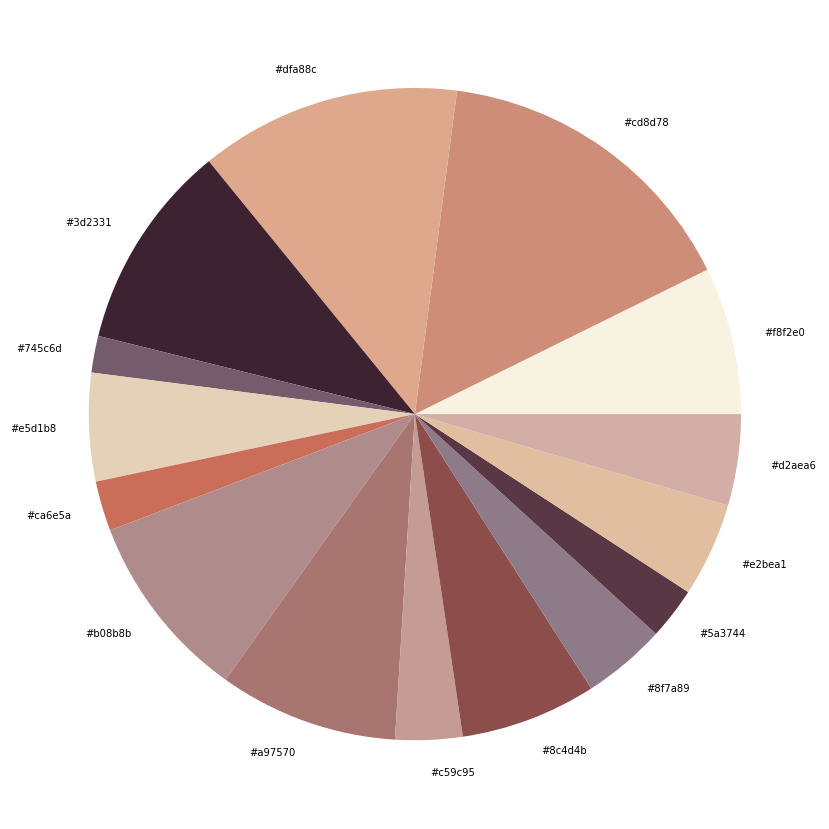

In [6]:
modified_image = prep_image(image)
color_analysis(modified_image)